In [84]:
%matplotlib inline
%pylab inline
from utils import *
from keras.models import load_model

Populating the interactive namespace from numpy and matplotlib


In [59]:
# Settings
input_dim = 27
output_dim = 1
nseqlen = 128
fdir = "csv"

# Load data
inputs, outputs, ids = load_data(fdir, input_dim, output_dim, nseqlen, nsamples = 20000)
n = inputs.shape[0]
ntrain = int(math.floor(n * 0.9))

In [60]:
globals()['weighted_binary_crossentropy']

<function utils.weighted_binary_crossentropy>

In [61]:
import keras
keras.objectives.weighted_binary_crossentropy = weighted_binary_crossentropy
model = load_model("model-64-3.h5")

In [86]:
def peak_cmp(annotated, predicted):
    dist = 0
    if len(predicted) == 0 or len(annotated) == 0:
        return -1
    
    for a in annotated:
        if a < 13 or a > nseqlen -13:
            continue
        dist += min(np.abs(predicted - a))
    return dist / float(len(annotated))

def eval_prediction(likelihood, true, patient, plot = True, shift = 1, delta = 0.5):
    sdist = []
    peakind = peakdet(likelihood[:,0],delta)
    for k,v in peakind[0]:
        if plot:
            plt.axvline(x=k)
    sdist.append(peak_cmp(np.where(true[:,0] > 0.5)[0], [k + shift for k,v in peakind[0]]))
    
    if plot:
        plt.plot(likelihood) # continous likelihood process
        plt.plot(true) # spikes on events
        plt.title(patient)
        axes = plt.gca()
        axes.set_xlim([0,true.shape[0]])
        plt.show()
        
    return sdist

def plot_kinematics(filename, fdir="", ids = None, fromfile=False, input_dim = 15, output_dim = 15, model = None):
    if not fromfile:
        ntrial = ids.index(filename)
        X = inputs[ntrial,:,0:input_dim]
        Y = outputs[ntrial,:,0:output_dim]
    else:
        R = np.loadtxt("%s/%s" % (fdir, filename), delimiter=',')
        X = R[:,0:input_dim]
        Y = R[:,input_dim:(input_dim + output_dim)]        

    likelihood = model.predict(X.reshape((1,-1,27)))[0]

    pylab.rcParams['figure.figsize'] = (5, 4)
    eval_prediction(likelihood, Y, filename)
    pylab.rcParams['figure.figsize'] = (15, 20)

    print("Kinematics of %s" % (filename))
    for i in range(15):
        ax = plt.subplot(5,3,1+i)
        ax.plot(X[:,i])
        ax.set_xlim([0,X.shape[0]])
        for x in np.where(Y[:,0] > 0.5)[0]:
            plt.axvline(x=x, color='g', linewidth=2)
#        for x in np.where(Y[:,1] > 0.5)[0]:
#            plt.axvline(x=x,color="r")

    plt.show()

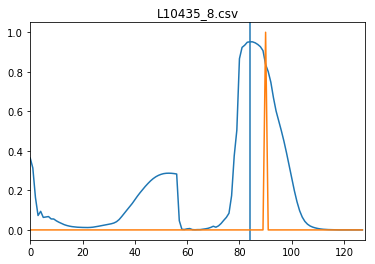

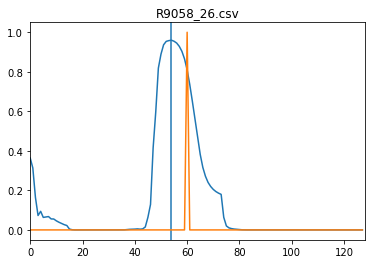

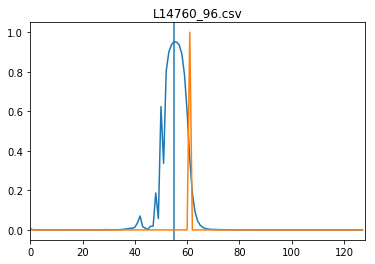

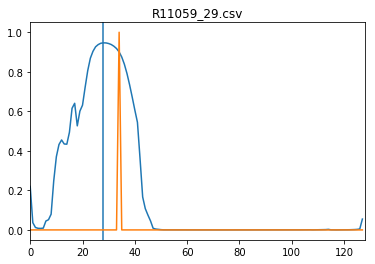

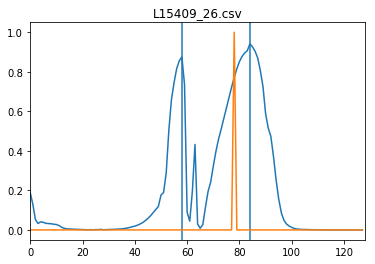

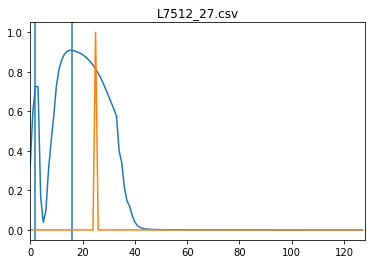

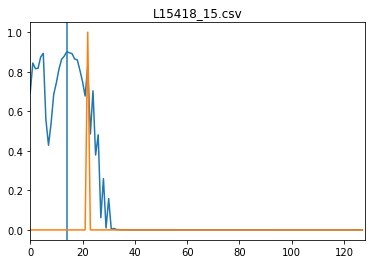

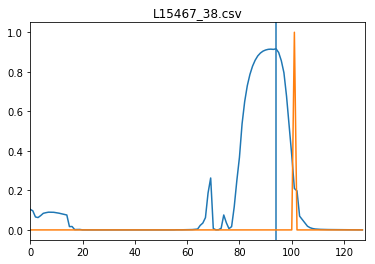

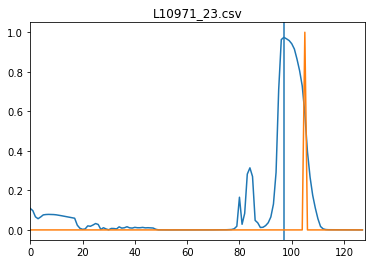

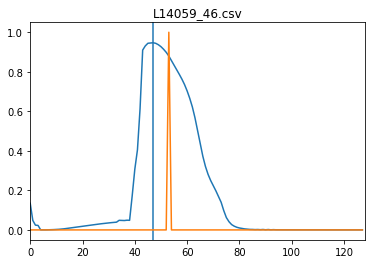

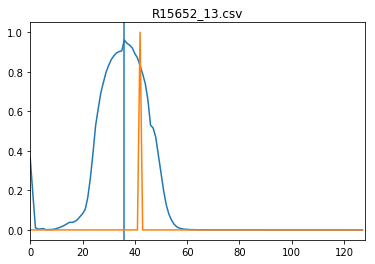

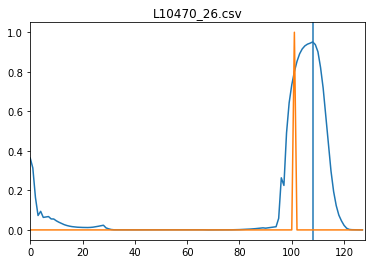

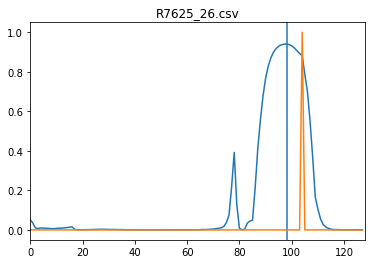

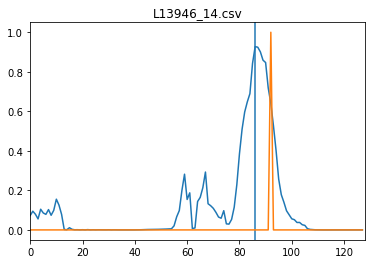

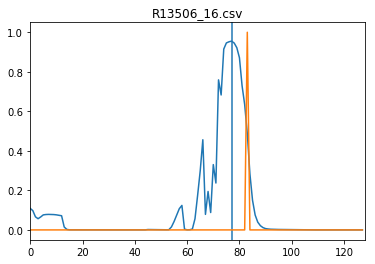

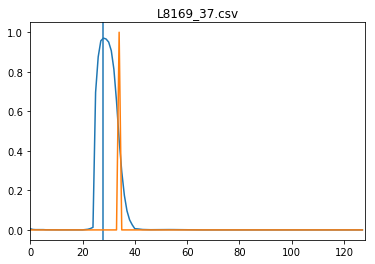

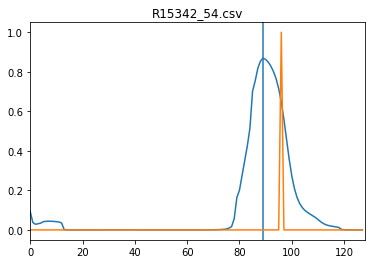

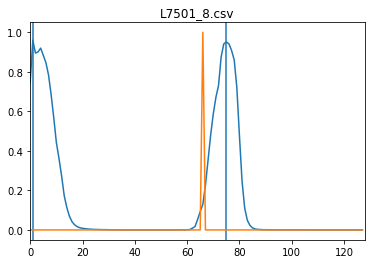

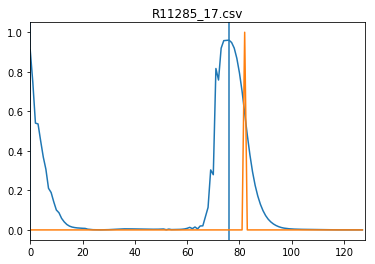

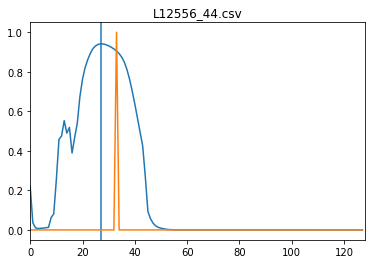

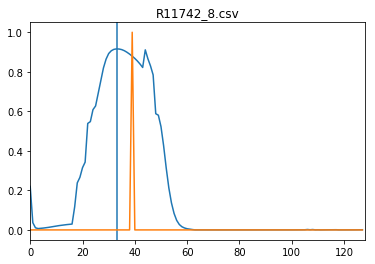

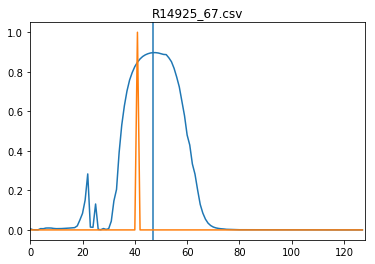

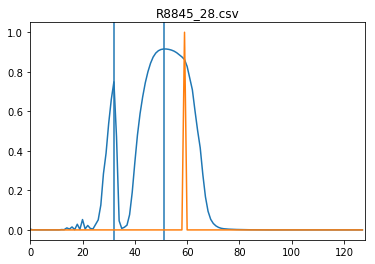

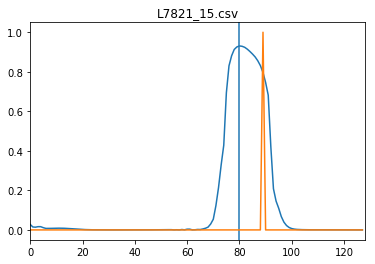

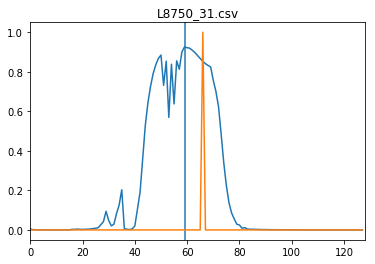

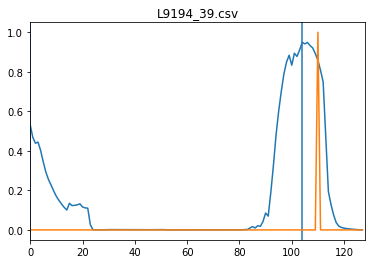

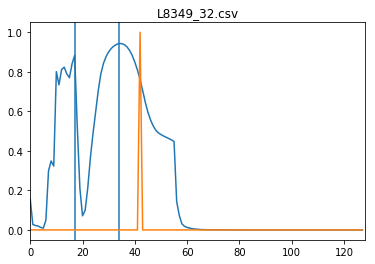

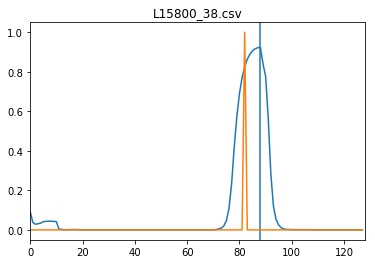

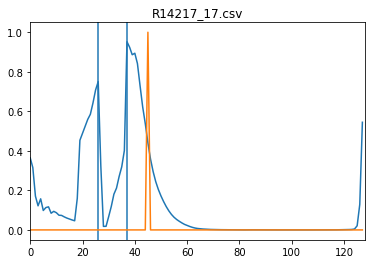

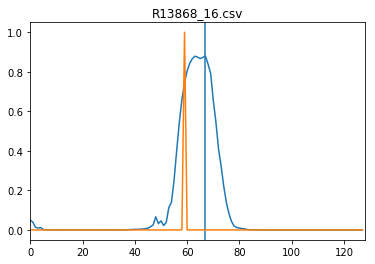

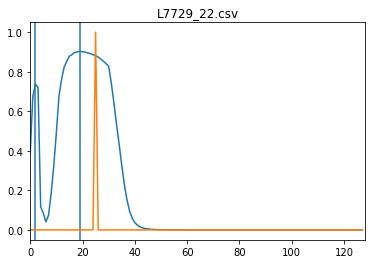

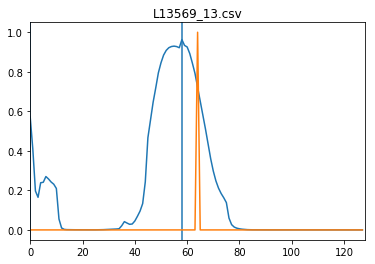

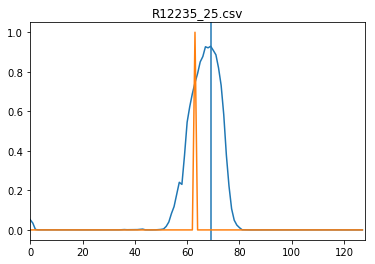

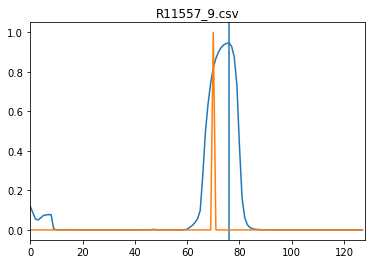

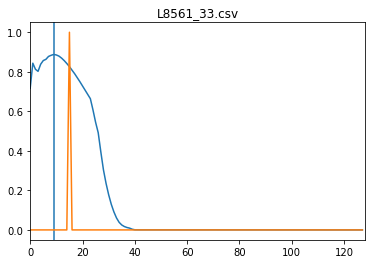

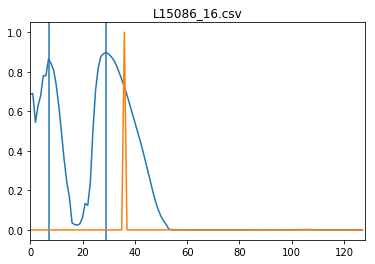

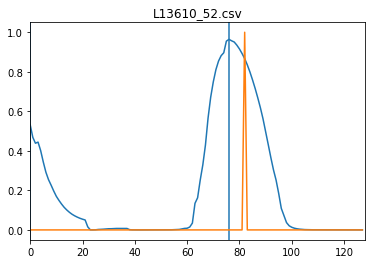

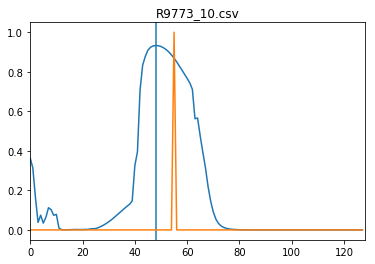

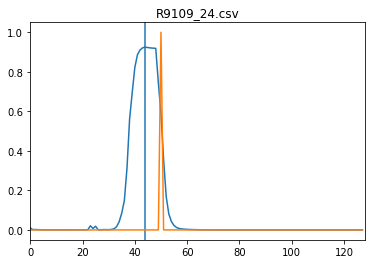

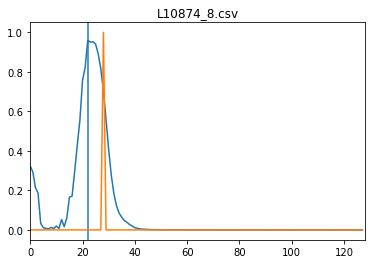

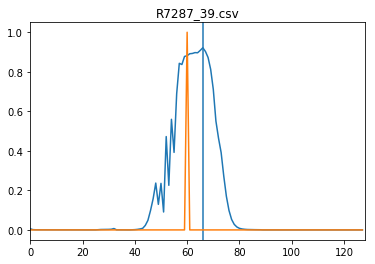

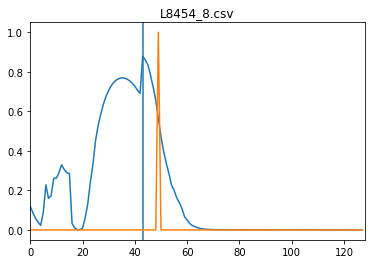

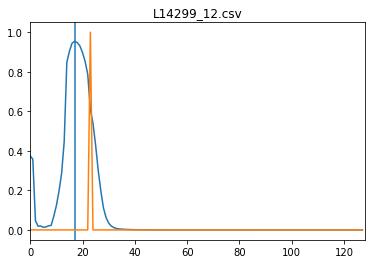

Error distribution:
<= 5: 0.933401
<= 10: 0.984864
<= 60: 0.998991
Mean distance: 2.198789


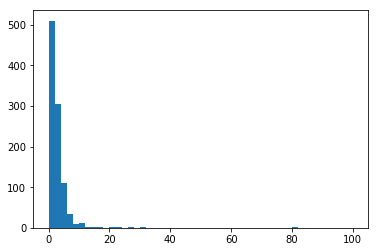

In [90]:
%matplotlib inline
shift = 0
delta = 0.5
sdist = []
res = model.predict(inputs[ntrain:n,:,:])
for ntrial in range(1000):
    likelihood = res[ntrial,:,:]
    true = outputs[ntrain + ntrial,:,:]
    d = eval_prediction(likelihood, true, ids[ntrain + ntrial], plot = False, shift = shift, delta = delta)
    if (d[0] > 5 and d[0] < 10):
        d = eval_prediction(likelihood, true, ids[ntrain + ntrial], plot = True, shift = shift, delta = delta)
    sdist.extend(d)
plot_stats(sdist)

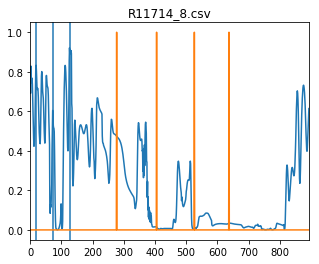

Kinematics of R11714_8.csv


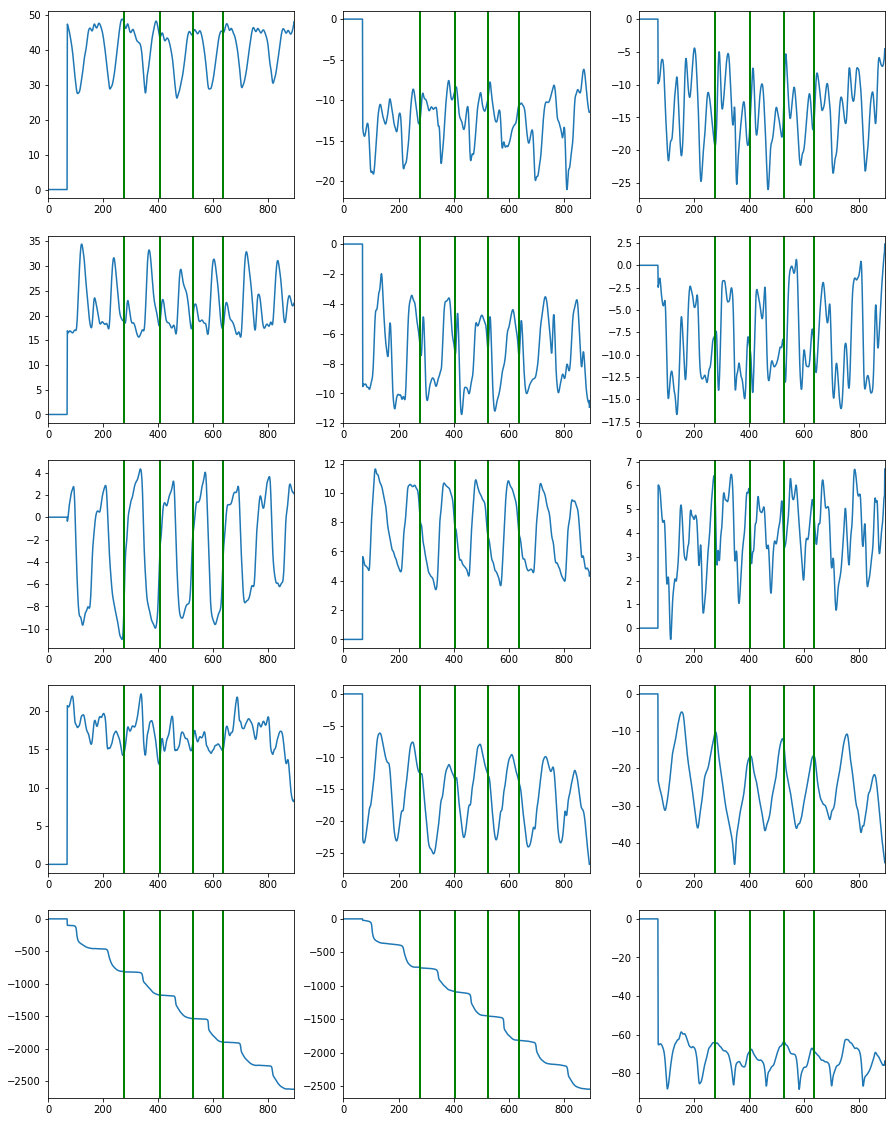

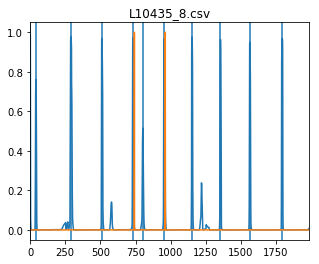

Kinematics of L10435_8.csv


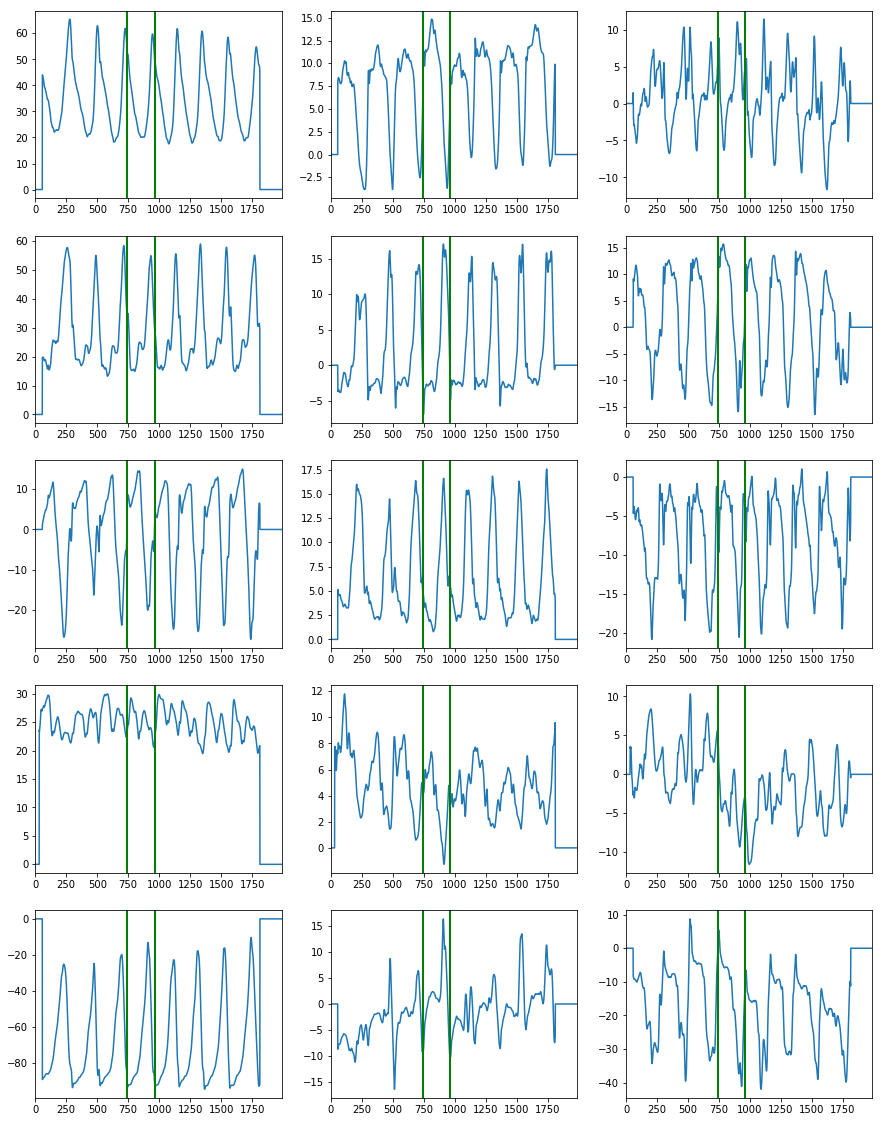

In [89]:
plot_kinematics("R11714_8.csv", fdir="csv", ids=ids, fromfile=True, input_dim = input_dim, output_dim = output_dim, model = model)
plot_kinematics("L10435_8.csv", fdir="csv", ids=ids, fromfile=True, input_dim = input_dim, output_dim = output_dim, model = model)